In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob # for sentiment analysis
import warnings
warnings.filterwarnings("ignore")

dff=pd.read_csv('netflix_titles.csv')
dff.shape
dff.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
dff.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


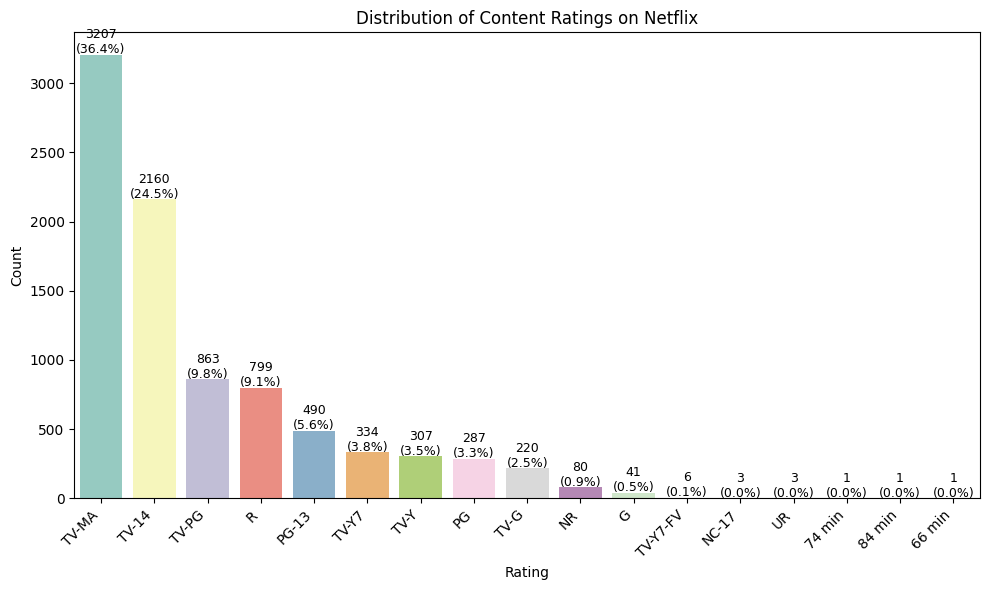

In [23]:

rating_counts = dff['rating'].value_counts()

total_count = rating_counts.sum()
rating_percentage = (rating_counts / total_count) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set3')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

for i, count in enumerate(rating_counts):
    plt.text(i, count + 10, f'{count}\n({rating_percentage[i]:.1f}%)', ha='center', fontsize=9)

plt.tight_layout()  
plt.show()


# Top 5 Actors and Directors:

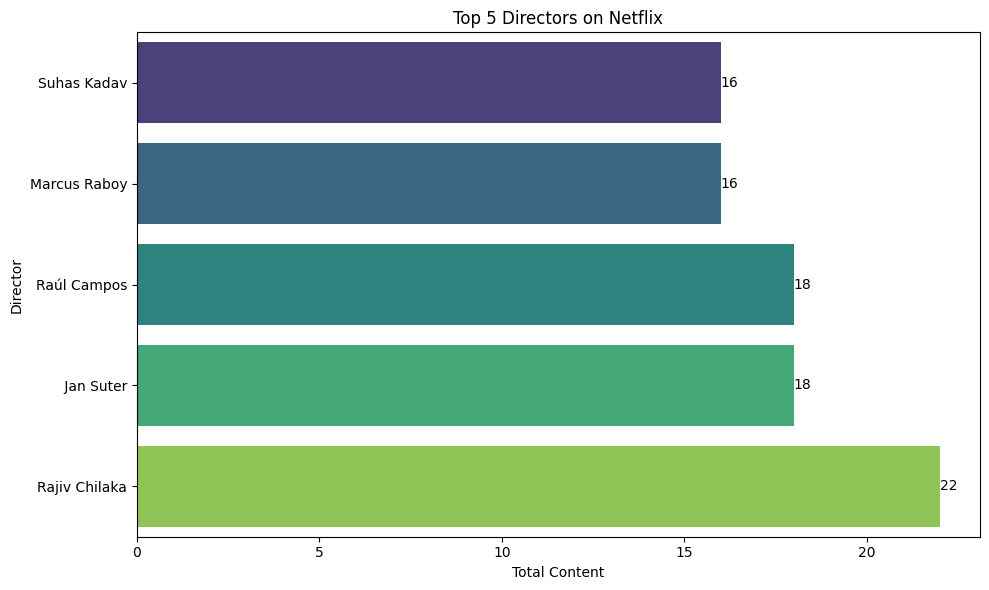

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dff['director'] = dff['director'].fillna('No Director Specified')

filtered_directors = dff['director'].str.split(',', expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']

directors = filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')

directors = directors[directors['Director'] != 'No Director Specified']

directors = directors.sort_values(by='Total Content', ascending=False)

directorsTop5 = directors.head()

directorsTop5 = directorsTop5.sort_values(by='Total Content')

total_content = directorsTop5['Total Content'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x='Total Content', y='Director', data=directorsTop5, palette='viridis')
plt.title('Top 5 Directors on Netflix')
plt.xlabel('Total Content')
plt.ylabel('Director')

# Display count values on each bar
for index, value in enumerate(directorsTop5['Total Content']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


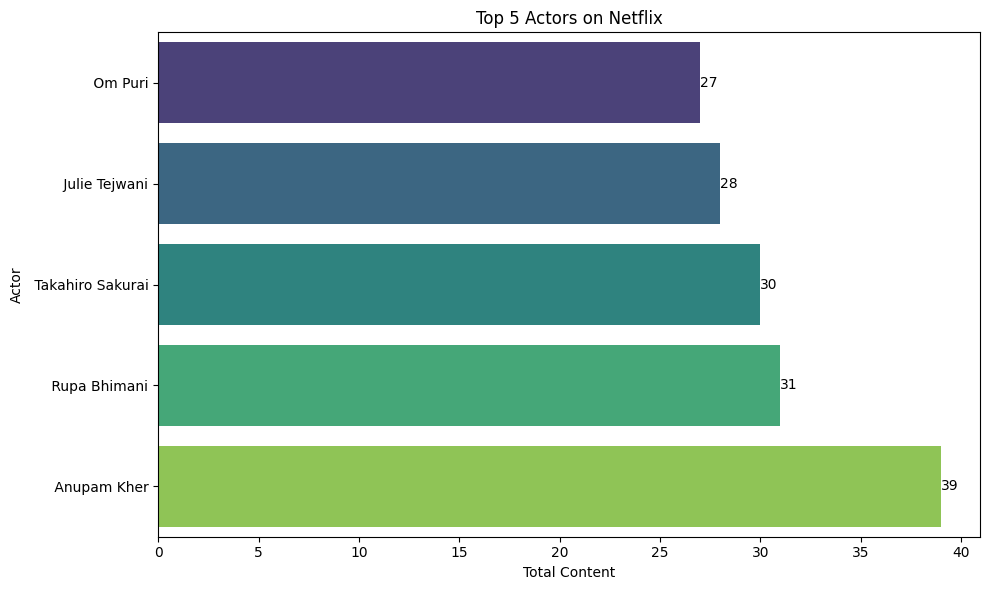

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dff['cast'] = dff['cast'].fillna('No Cast Specified')

filtered_actors = dff['cast'].str.split(',', expand=True).stack()
filtered_actors = filtered_actors.to_frame()
filtered_actors.columns = ['Actor']

actors = filtered_actors.groupby(['Actor']).size().reset_index(name='Total Content')
actors = actors[actors['Actor'] != 'No Cast Specified']

actors = actors.sort_values(by='Total Content', ascending=False)
actorsTop5 = actors.head()
actorsTop5 = actorsTop5.sort_values(by='Total Content')

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Content', y='Actor', data=actorsTop5, palette='viridis')
plt.title('Top 5 Actors on Netflix')
plt.xlabel('Total Content')
plt.ylabel('Actor')

for index, value in enumerate(actorsTop5['Total Content']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


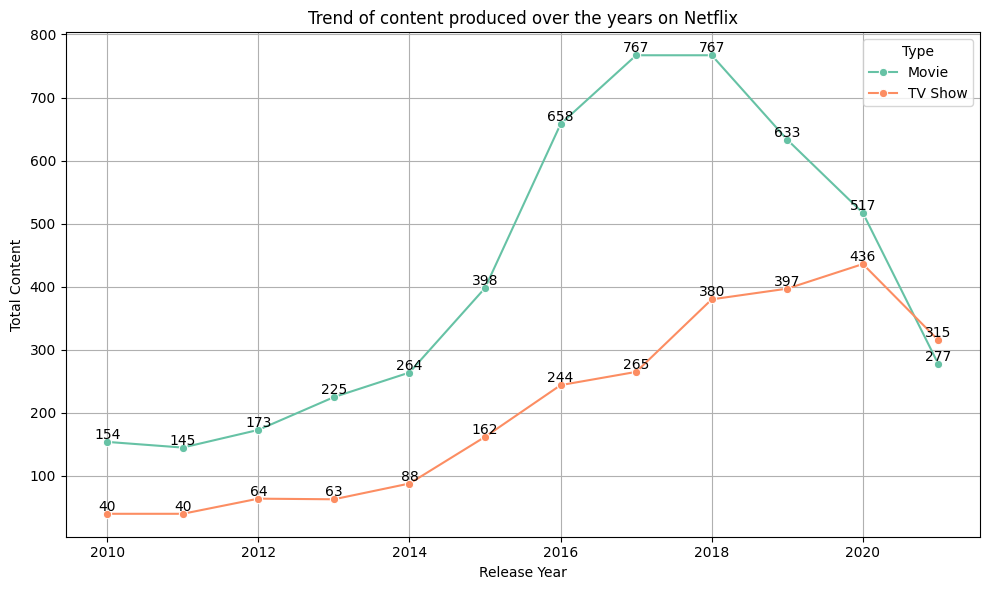

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = dff[['type', 'release_year']]
df1 = df1.rename(columns={"release_year": "Release Year"})

df2 = df1.groupby(['Release Year', 'type']).size().reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='Release Year', y='Total Content', hue='type', marker='o', palette='Set2')

plt.title('Trend of content produced over the years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Total Content')
plt.grid(True)
plt.legend(title='Type')

# Display count values on each point
for _, row in df2.iterrows():
    plt.text(row['Release Year'], row['Total Content'], str(row['Total Content']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


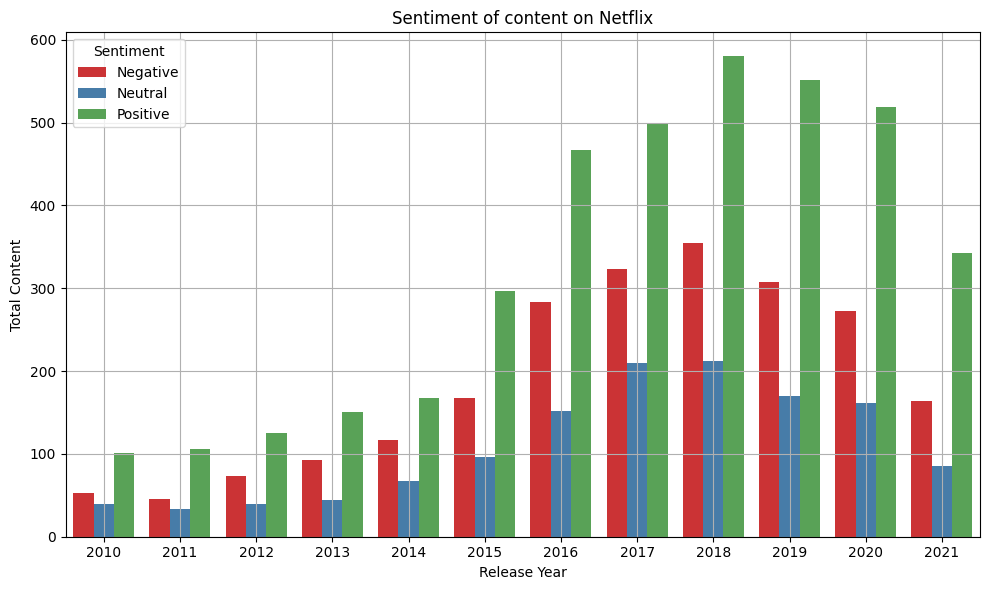

In [59]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

dfx = dff[['release_year', 'description']]
dfx = dfx.rename(columns={'release_year': 'Release Year'})

sentiments = []

for _, row in dfx.iterrows():
    testimonial = TextBlob(row['description'])
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    sentiments.append(sent)

dfx['Sentiment'] = sentiments
dfx = dfx.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Content')
dfx = dfx[dfx['Release Year'] >= 2010]

plt.figure(figsize=(10, 6))
sns.barplot(data=dfx, x="Release Year", y="Total Content", hue="Sentiment", palette="Set1")
plt.title("Sentiment of content on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Total Content")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

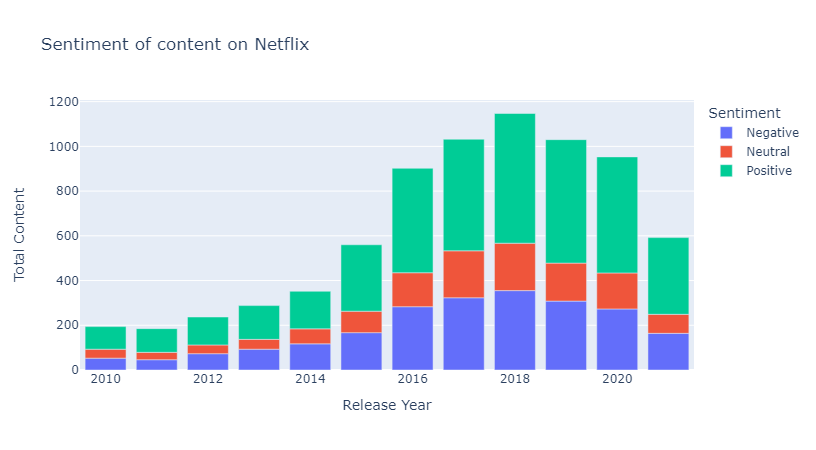

Die obige Grafik zeigt, dass der Gesamtinhalt, der als positiv bewertet wird, immer größer ist als der neutrale und negative Inhalt zusammen.
